### PEMBUATAN MACHINE LEARNING
### Adrian Syah Abidin
### 20/463588/TK/51580

In [196]:
# menanmbahkan library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [197]:
# mengimport data set
fileLocation = 'D:\KULIAH SEM 3\TUGAS AI\Data_ML.xlsx'
df = pd.read_excel(fileLocation, index_col = 0, header=2)
df.head()

,mcap,tvalue
emiten,,
DSSA,18.32,0.344
BYAN,93.17,9.750
MEGA,58.26,0.495
ITMG,28.05,153.110
MLBI,16.86,0.681


In [198]:
# menyederhakan data set
z=df.iloc[0:21,0:4]
z

,mcap,tvalue
emiten,,
DSSA,18.320,0.3440
BYAN,93.170,9.7500
MEGA,58.260,0.4950
ITMG,28.050,153.1100
MLBI,16.860,0.6810
ICBP,102.920,90.7100
UNVR,158.320,136.6000
GGRM,62.770,15.0700
EDGE,10.470,0.1040


In [199]:
z.describe()

,mcap,tvalue
count,19.000000,19.000000
mean,36.267842,38.389995
std,42.878273,61.036524
min,0.154000,0.000900
25%,6.305000,0.419500
50%,18.320000,1.290000
75%,57.665000,64.120000
max,158.320000,190.130000


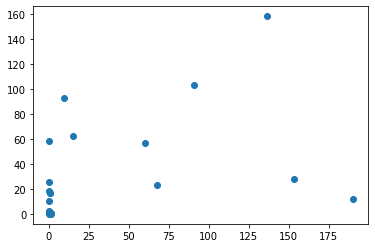

In [200]:
# menampilkan persebaran data
plt.scatter(z['tvalue'],z['mcap'])

In [201]:
# menggunakan library sklearn untuk memasukkan metode kmeans
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(z[['tvalue','mcap']])
y_predicted

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [202]:
# menampilkan data hasil kmeans dengan terdapat cluster
z['cluster'] = y_predicted
z

,mcap,tvalue,cluster
emiten,,,
DSSA,18.320,0.3440,0
BYAN,93.170,9.7500,0
MEGA,58.260,0.4950,0
ITMG,28.050,153.1100,1
MLBI,16.860,0.6810,0
ICBP,102.920,90.7100,1
UNVR,158.320,136.6000,1
GGRM,62.770,15.0700,0
EDGE,10.470,0.1040,0


In [203]:
# menampilkan letak centroid
km.cluster_centers_

array([[ 10.59066,  25.8566 ],
       [142.6375 ,  75.31   ]])

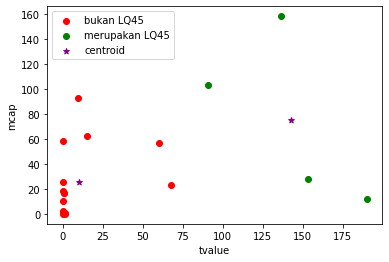

In [204]:
# menggambar data yang telah selesai menggunakan metode kmeans
z1 = z[z.cluster==0]
z2 = z[z.cluster==1]

plt.scatter(z1.tvalue,z1['mcap'],color='red',label='bukan LQ45')
plt.scatter(z2.tvalue,z2['mcap'],color='green',label='merupakan LQ45')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

plt.xlabel('tvalue')
plt.ylabel('mcap')

plt.legend()

In [205]:
# menampilkan nilai error
k_rng = range(1,20)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(z[['tvalue','mcap']])
    sse.append(km.inertia_)
    
sse

[100152.06363833578,
 37366.779241876,
 21770.053616875997,
 10510.113557309,
 5630.789203975665,
 3043.2631539756662,
 2228.417953975667,
 1514.937899809,
 825.6263866680001,
 235.49853666800004,
 119.11317416800003,
 42.900286118000004,
 6.979650701333329,
 3.218421004999997,
 1.7980248383333328,
 0.8084080099999981,
 0.3059670099999991,
 0.014341000000000074,
 0.0]

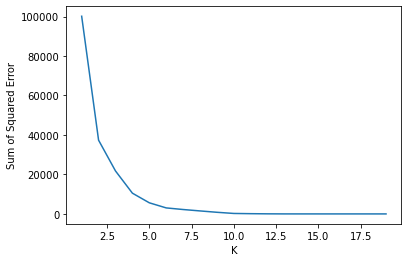

In [206]:
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')
plt.plot(k_rng,sse)

Dari hasil didapat bahwa emiten yang masuk kedalam indeks LQ45 adalah ITMG , ICBP, UNVR, dan TINS. 
Data yang diambil sesuai dengan indeks yang sebenarnya bahwa 4 emiten tersebut memang LQ45, akan tetapi terdapat emiten 
yang tidak masuk kedalam cluster 1 atau LQ45 pada hasil yaitu emiten GGRM dan INDF yang sebenarnya merupakan LQ45, hal ini meruapakan
error yang terjadi karena nilai transaksi pada kedua emien tersebut tidak cukup besar, sehingga oleh machine learning dianggap
termasuk cluster 0 atau bkan LQ45.